## 라이브러리 및 데이터 가져오기



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
60000


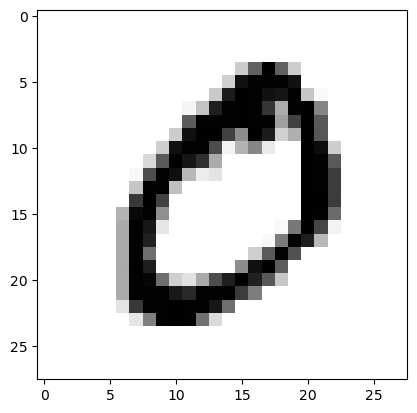

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
flat = x_train[1].flatten()  # 2D → 1D로 평탄화

# 한 줄에 28개씩 출력
for i in range(0, len(flat), 28):
    print(' '.join(f'{val:3}' for val in flat[i:i+28]))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0   0   0 

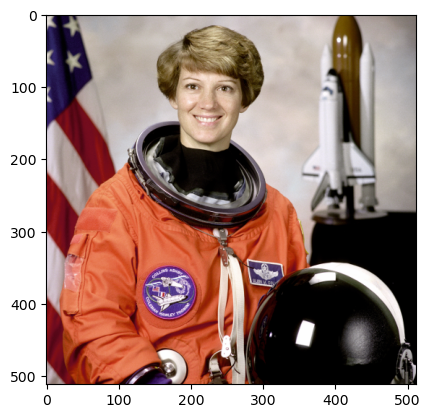

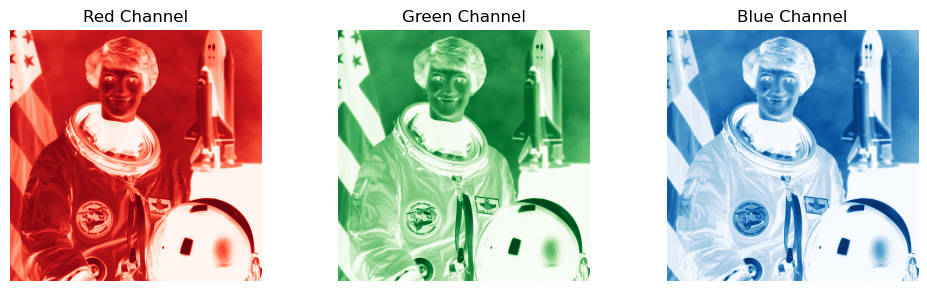

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# 예제 컬러 이미지: 'astronaut' (카메라맨은 흑백이라 RGB용으로 'astronaut' 사용)
img = data.astronaut()  # shape: (512, 512, 3)

# 채널 분리
r_channel = img[:, :, 0]
g_channel = img[:, :, 1]
b_channel = img[:, :, 2]

# 채널 텍스트 출력을 위한 함수
def print_channel(channel, name):
    output = []
    output.append(f'--- {name} Channel ---')
    for row in channel[:10]:  # 상위 10줄만 출력
        output.append(' '.join(f'{val:3}' for val in row[:32]))  # 각 줄 32개만
    return output

# 채널별 숫자 출력 결과 준비
r_output = print_channel(r_channel, 'Red')
g_output = print_channel(g_channel, 'Green')
b_output = print_channel(b_channel, 'Blue')

# plt.imshow(img, cmap=cmap)
plt.imshow(img)

# 채널 시각화
plt.figure(figsize=(10, 3))
for i, (channel, cmap, title) in enumerate(zip(
    [r_channel, g_channel, b_channel],
    ['Reds', 'Greens', 'Blues'],
    ['Red', 'Green', 'Blue']
)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap=cmap)
    plt.title(f'{title} Channel')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [5]:
print(y_train[1])

0


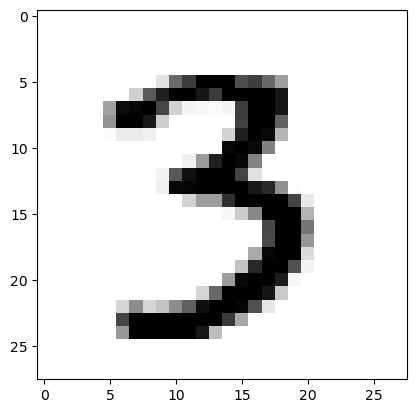

10001 번째 이미지의 숫자는 바로  3 입니다.


In [6]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
print(x_test.shape)

(10000, 28, 28)


In [9]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로는 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋다.

In [10]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 생성 -> Sequential API, 딥러닝 레이어

keras.layers.Conv2D(사용하는 이미지 특징의 수, ..)  
keras.layers.Dense(분류기에 사용되는 뉴런의 숫자, ..) -> 결과적으로 분류해 내야 하는 클래스 수로 지정  
ex) 숫자 인식기에서는 10, 알파벳 인식기에서는 52

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


C:\Users\juwonhee\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 얼마나 잘 만들었는지 확인

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

## 딥러닝 네트워크 학습시키기

네트워크의 입력은 `(데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)`  
따라서 x_train, x_test에 채널 수 정보를 추가

In [13]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터 수에 -1을 쓰면 reshape시 자동계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


학습할 때마다 인식 정확도(accuracy)는 변동 -> 학습용 데이터를 가지고 구한 정확도

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8683 - loss: 0.4474
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9803 - loss: 0.0644
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0433
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0329
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0238
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9940 - loss: 0.0203
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9952 - loss: 0.0160
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9955 - loss: 0.0145
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9961 - loss: 0.0122
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9966 - loss: 0.0097


## 얼마나 잘 만들었는지 확인하기

테스트용 데이터를 가지고 구한 정확도

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9889 - loss: 0.0407
test_loss: 0.040734678506851196
test_accuracy: 0.9889000058174133


학습/테스트 데이터의 손글씨 주인이 다르기 때문에 한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높다고 판단.

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포 확인 가능

In [16]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
model.predict() 결과 :  [1.08413105e-10 1.13683533e-11 1.28210761e-10 8.10485082e-11
 4.21191887e-10 1.66742436e-11 1.20212703e-17 1.00000000e+00
 1.87030621e-12 1.87098781e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


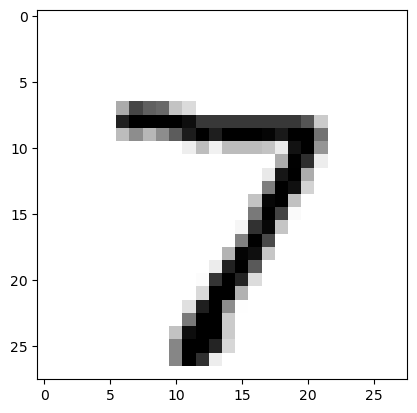

In [17]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.6005686e-11 6.2656227e-06 2.5756915e-08 3.8152123e-03 4.0917369e-10
 9.7300535e-01 4.8030206e-08 8.5994217e-10 2.3172336e-02 7.8736332e-07]
라벨: 8, 예측결과: 5


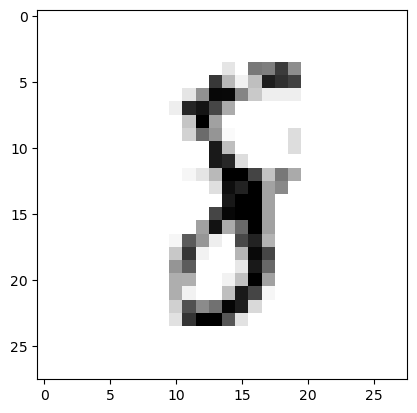

예측확률분포: [4.9565799e-13 3.4139180e-08 1.9478330e-10 2.3356654e-01 2.3159080e-10
 7.6643217e-01 1.0205871e-10 1.1111821e-07 1.0761514e-06 4.0773763e-08]
라벨: 3, 예측결과: 5


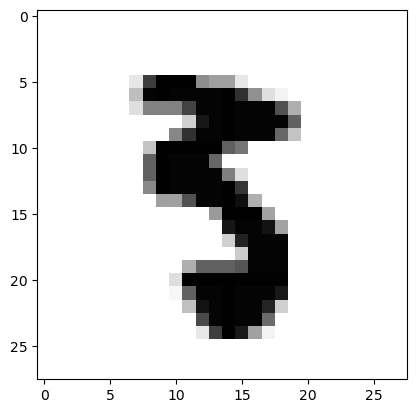

예측확률분포: [7.3091644e-09 1.0743014e-07 1.4467641e-07 8.6912166e-08 1.0559804e-06
 1.3625497e-05 8.5724294e-01 1.8821392e-13 1.4274213e-01 5.7603842e-09]
라벨: 8, 예측결과: 6


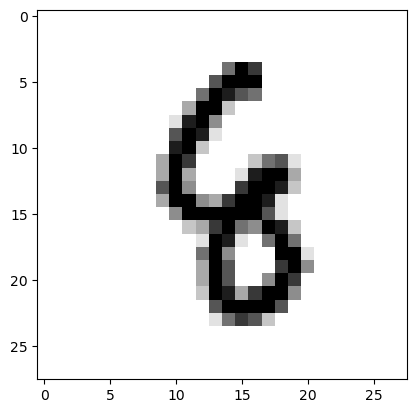

예측확률분포: [3.9730028e-05 2.6432176e-07 5.7712430e-07 5.9636513e-08 1.4376000e-02
 4.1350489e-07 9.8558283e-01 1.3953275e-10 8.1851532e-08 3.3622420e-09]
라벨: 4, 예측결과: 6


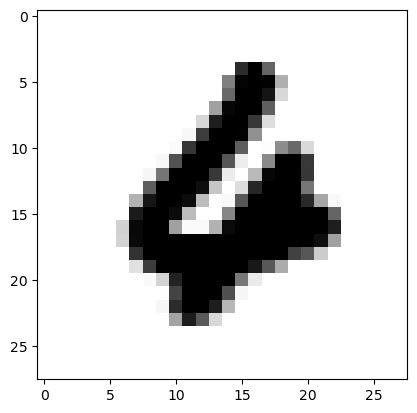

예측확률분포: [2.8776481e-09 1.6642899e-07 2.1662333e-04 9.6274930e-01 1.4379838e-09
 1.5756735e-08 2.1314809e-05 9.2922375e-07 3.7011601e-02 5.2648979e-08]
라벨: 8, 예측결과: 3


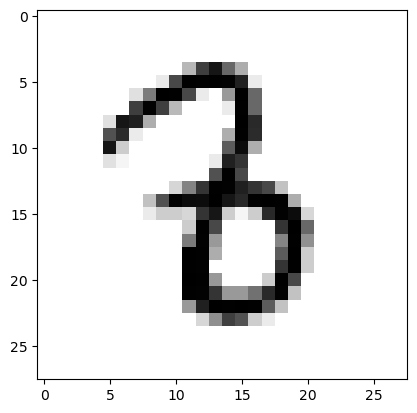

In [18]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 더 좋은 네트워크 만들어 보기

### 하이퍼파라미터 바꿔보기
- Conv2D 레이어에서 입력 이미지 특징 수 +/-
- Dense 레이어에서 뉴런 수 변경
- 학습 반복 횟수 epoch값 변경

In [19]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10 # 그대로임

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8634 - loss: 0.4403
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0699
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9861 - loss: 0.0462
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0321
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0260
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9930 - loss: 0.0216
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9944 - loss: 0.0172
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9952 - loss: 0.0148
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9965 - loss: 0.0114
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9968 - loss: 0.0099
313/313 - 1s - 3ms/step - accuracy: 0.9878 - loss: 0.0427
test_loss: 0.04269972816109657 
test_accuracy: 0.98780

# 프로젝트

In [77]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
1.26.4


### 파일 압축 해제

In [78]:
import os
import zipfile

# 압축을 풀고 싶은 상위 디렉토리
base_dir = 'images'
# 대상 하위 디렉토리 리스트
folders = ['scissor', 'rock', 'paper']

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    
    # 폴더 내의 모든 파일 확인
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.zip'):
            zip_path = os.path.join(folder_path, file_name)
            # zip 파일을 해당 폴더에 압축 해제
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(folder_path)
            print(f"압축 해제 완료: {zip_path}")

압축 해제 완료: images\scissor\Class 2-samples.zip
압축 해제 완료: images\rock\Class 3-samples.zip
압축 해제 완료: images\paper\Class 1-samples.zip


In [79]:
# !unzip /content/rock_scissor_paper/scissor/scissor.zip -d 가위
# !unzip /content/rock_scissor_paper/rock/rock.zip -d 바위
# !unzip /content/rock_scissor_paper/paper/paper.zip   -d 보

In [80]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 데이터 불러오기 + resize(28x28)

In [81]:
import glob
from PIL import Image
import os

def resize_images(img_path):
    # 모든 JPG 이미지 경로 수집
    images = glob.glob(os.path.join(img_path, "*.jpg"))

    print(len(images), "images to be resized.")

    target_size = (28, 28)

    for img_path in images:
        try:
            with Image.open(img_path) as old_img:
                new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
                new_img.save(img_path, "JPEG")
        except Exception as e:
            print(f"Failed to resize image {img_path}: {e}")

    print(len(images), "images resized.")

In [82]:
image_dir_path = "images/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = "images/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = "images/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100 images to be resized.
100 images resized.
가위 이미지 resize 완료!
100 images to be resized.
100 images resized.
바위 이미지 resize 완료!
100 images to be resized.
100 images resized.
보 이미지 resize 완료!


In [83]:
# def resize_images(img_path):
# 	images=glob.glob(img_path + "/*.jpg")

# 	print(len(images), " images to be resized.")

#   # 파일마다 모두 28x28 사이즈로 바꾸어 저장
# 	target_size=(28,28)
# 	for img in images:
# 		old_img=Image.open(img)
# 		new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
# 		new_img.save(img, "JPEG")

# 	print(len(images), " images resized.")

# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = "/content/가위/scissor"
# resize_images(image_dir_path)

# print("가위 이미지 resize 완료!")

In [84]:
# image_dir_path = "/content/바위/rock"
# resize_images(image_dir_path)

# print("바위 이미지 resize 완료!")

# image_dir_path = "/content/보/paper"
# resize_images(image_dir_path)

# print("보 이미지 resize 완료!")

### 학습 데이터 만들어주기

In [85]:
import numpy as np
import glob
import os
from PIL import Image
from sklearn.utils import shuffle

def load_data(img_path, number_of_data=300):
    img_size = 28
    color = 3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    class_dirs = {
        0: 'scissor',
        1: 'rock',
        2: 'paper'
    }

    idx = 0
    for label, folder in class_dirs.items():
        full_path = os.path.join(img_path, folder)
        for file in glob.iglob(os.path.join(full_path, '*.jpg')):
            try:
                with Image.open(file) as img:
                    img_array = np.array(img, dtype=np.int32)
                    if img_array.shape == (img_size, img_size, color):
                        imgs[idx] = img_array
                        labels[idx] = label
                        idx += 1
                        if idx >= number_of_data:
                            break
                    else:
                        print(f"이미지 크기 불일치 - {file} (shape: {img_array.shape})")
            except Exception as e:
                print(f"이미지 로딩 실패 - {file}: {e}")
        if idx >= number_of_data:
            break

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs[:idx], labels[:idx]

# 실제 경로 설정
image_dir_path = "images"
x_train, y_train = load_data(image_dir_path)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [86]:
# import numpy as np
# import glob
# import os
# from PIL import Image
# from sklearn.utils import shuffle

# def load_data(img_path, number_of_data=300):
#     # 가위 : 0, 바위 : 1, 보 : 2
#     img_size=28
#     color=3
#     #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
#     imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
#     labels=np.zeros(number_of_data,dtype=np.int32)

#     idx=0
#     for file in glob.iglob(img_path+'/가위/scissor/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=0   # 가위 : 0
#         idx=idx+1

#     for file in glob.iglob(img_path+'/바위/rock/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=1   # 바위 : 1
#         idx=idx+1

#     for file in glob.iglob(img_path+'/보/paper/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=2   # 보 : 2
#         idx=idx+1

#     print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
#     return imgs, labels

#     print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
#     return imgs, labels

# image_dir_path = "/content"
# x_train, y_train = load_data(image_dir_path)
# x_train, y_train = shuffle(x_train, y_train, random_state=42)
# x_train_norm = x_train / 255.0
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)


In [87]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터 수에 -1을 쓰면 reshape시 자동계산

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


라벨:  0


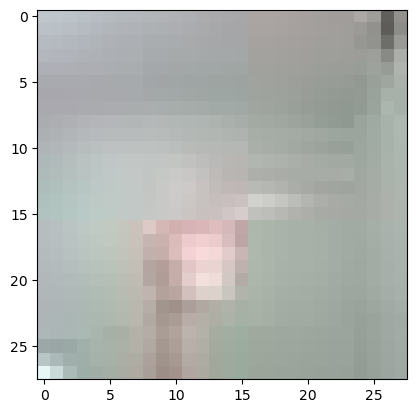

In [88]:
import matplotlib.pyplot as plt

plt.imshow(x_train[224])
print('라벨: ', y_train[224])

In [89]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2882 - loss: 17.0959
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3545 - loss: 3.6086
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3118 - loss: 1.9856 
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3175 - loss: 1.3656
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4693 - loss: 1.0742 
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4951 - loss: 0.9943
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6042 - loss: 0.8546
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6842 - loss: 0.7729
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6715 - loss: 0.8137 
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7150 - loss: 0.7715 
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7160 - loss: 0.6787 
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7

In [91]:
import numpy as np
import os
import glob
from PIL import Image
from sklearn.utils import shuffle

# 이미지 리사이즈 함수
def resize_images(directory, target_size=(28, 28)):
    image_paths = glob.glob(os.path.join(directory, '*.jpg'))
    for path in image_paths:
        img = Image.open(path)
        img = img.resize(target_size)
        img.save(path)  # 리사이즈된 이미지를 원본 경로에 저장

# 이미지 불러오기 함수
def load_data2(base_path, number_of_data=300):
    img_size = 28
    color = 3
    imgs = np.zeros((number_of_data, img_size, img_size, color), dtype=np.int32)
    labels = np.zeros((number_of_data,), dtype=np.int32)

    class_names = ['scissor', 'rock', 'paper']
    idx = 0

    for label, class_name in enumerate(class_names):
        folder = os.path.join(base_path, class_name)
        files = glob.glob(os.path.join(folder, '*.jpg'))

        for file in files:
            if idx >= number_of_data:
                break
            img = Image.open(file)
            img = img.resize((img_size, img_size))  # 혹시 resize_images 안 썼을 경우 대비
            img = np.array(img, dtype=np.int32)

            if img.shape == (img_size, img_size, color):  # RGB 여부 확인
                imgs[idx] = img
                labels[idx] = label
                idx += 1

    print(f"테스트 데이터(x_test)의 이미지 개수는 {idx}입니다.")
    return imgs[:idx], labels[:idx]

In [92]:
# import numpy as np
# import glob
# import os
# from PIL import Image
# from sklearn.utils import shuffle

# def load_data2(img_path, number_of_data=300):
#     # 가위 : 0, 바위 : 1, 보 : 2
#     img_size=28
#     color=3
#     #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
#     imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
#     labels=np.zeros(number_of_data,dtype=np.int32)

#     idx=0
#     for file in glob.iglob(img_path+'/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=0   # 가위 : 0
#         idx=idx+1

#     for file in glob.iglob(img_path+'/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=1   # 바위 : 1
#         idx=idx+1

#     for file in glob.iglob(img_path+'/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=2   # 보 : 2
#         idx=idx+1

#     print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
#     return imgs, labels

#     print("테스트 데이터(y_test)의 이미지 개수는", idx, "입니다.")
#     return imgs, labels
     

In [65]:
import os
import zipfile

# 압축을 풀고 싶은 상위 디렉토리
base_dir = 'test'
# 대상 하위 디렉토리 리스트
folders = ['scissor', 'rock', 'paper']

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    
    # 폴더 내의 모든 파일 확인
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.zip'):
            zip_path = os.path.join(folder_path, file_name)
            # zip 파일을 해당 폴더에 압축 해제
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(folder_path)
            print(f"압축 해제 완료: {zip_path}")

압축 해제 완료: test\scissor\scissor.zip
압축 해제 완료: test\rock\rock.zip
압축 해제 완료: test\paper\paper.zip


In [93]:
image_dir_path = "/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

# 올바른 경로 전달
image_dir_path = "test"
(x_test, y_test) = load_data2(image_dir_path, number_of_data=300)

x_test_norm = x_test/255.0  
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

가위 이미지 resize 완료!
바위 이미지 resize 완료!
보 이미지 resize 완료!
테스트 데이터(x_test)의 이미지 개수는 300입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [94]:
# 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 19ms/step - accuracy: 0.3300 - loss: 5.8039
test_loss: 5.803896427154541 
test_accuracy: 0.33000001311302185


In [95]:
## 미리 압축해서 업로드

# !unzip 가위_test-samples.zip -d 가위_test
# !unzip 바위_test-samples.zip -d 바위_test
# !unzip 보_test-samples.zip   -d 보_test

In [96]:
# y_train

In [97]:
print(y_train)

[2 2 1 0 2 2 1 1 0 1 2 0 2 0 1 2 2 2 1 1 0 1 2 2 1 0 2 2 1 2 0 1 0 0 2 1 0
 0 0 0 0 0 2 0 0 0 2 2 1 2 1 1 2 0 2 2 0 0 1 0 2 0 0 1 1 0 0 2 0 1 1 1 2 1
 1 2 0 0 0 2 1 1 0 1 0 1 1 0 0 0 1 1 0 2 0 0 1 1 2 0 2 0 0 1 2 2 1 0 1 0 1
 2 0 2 2 1 1 2 1 2 0 1 1 1 1 2 0 1 1 2 1 1 1 1 2 2 1 1 1 0 1 1 1 1 2 2 1 0
 0 0 2 1 2 1 2 2 2 0 1 0 2 1 0 0 0 1 2 2 1 0 0 2 2 0 0 2 1 0 2 1 2 0 2 2 1
 2 2 1 0 0 0 1 2 2 2 0 2 2 0 2 0 1 0 2 1 2 2 1 0 1 1 2 0 0 2 0 0 2 1 0 1 2
 2 1 0 2 1 0 2 2 0 2 2 2 1 0 0 0 2 2 2 2 1 0 2 1 1 2 2 0 1 0 1 0 1 1 0 0 2
 0 0 0 2 0 0 1 2 1 2 2 0 0 1 1 2 1 1 0 0 2 2 0 1 2 1 2 1 1 1 0 0 2 1 2 0 1
 0 1 2 1]
